## PlaneCurveSmoo: 3D Curve on a Plane with Rotation:

$$
\text{Parametric Equation of the 3D Curve:}

\begin{cases}
x(t) = \sin(2t), \\
y(t) = \sin(3t), \\
z(t) = \frac{1}{2} \sin(3t),
\end{cases} 
\quad t \in [0, 2\pi]
$$


**Preview**

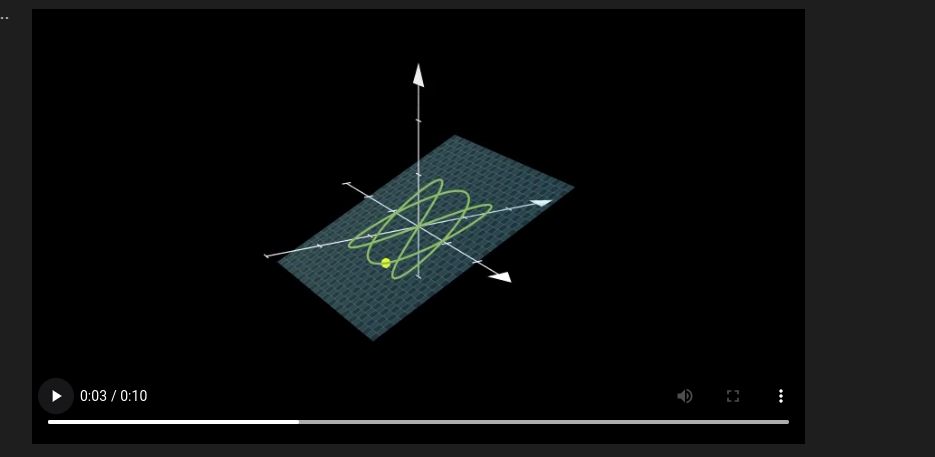

## 1. Define the 3D Scene

---

```python
class PlaneCurveSmoothRotationV19(ThreeDScene):
    def construct(self):
        ...
```



- ``ThreeDScene`` is a specialized Manim scene class for 3D animations.

- ``construct()`` is the main function where all objects and animations are defined.

---

## 2. Create 3D Axes

```python
axes = ThreeDAxes(
    x_range=[-3, 3, 1], # [start, end, n_points]
    y_range=[-3, 3, 1], # [start, end, n_points]
    z_range=[-1, 3, 1], # [start, end, n_points]
    x_length=6,
    y_length=6,
    z_length=4,
)
self.add(axes)

```


- ``ThreeDAxes`` creates 3D axes for reference.

- ``x_range, y_range, z_range`` define the visible limits and tick intervals.

- ``x_length, y_length, z_length`` control the visual size of the axes.

## 3. Create a 3D Plane

```python
plane_surface = Surface(
    lambda u, v: np.array([u, v, 0.5*v]), # surface / plane => [x, y, z/2]
    u_range=[-2, 2], # [-2, 2]
    v_range=[-2, 2],
    resolution=(30, 30),
    checkerboard_colors=[BLUE_D, BLUE_E],
    fill_opacity=0.3,
    stroke_opacity=0.2,
)
self.add(plane_surface)
```


- ``Surface`` creates a 3D plane defined by a parametric ``function of (u, v)``.

- ``checkerboard_colors`` adds a visual pattern to help perceive depth.

- ``fill_opacity`` and ``stroke_opacity`` control transparency and line visibility.

## 4. Draw a Curve on the Plane

```python

t_vals = np.linspace(0, TAU, 200) # points accross the curve

curve_points = [np.array([np.sin(2*t), np.sin(3*t), 0.5*np.sin(3*t)]) for t in t_vals] # curve points


curve = VMobject(color=GREEN)
curve.set_points_as_corners(curve_points)
self.play(Create(curve), run_time=2)
```

- Generates 200 points along a parametric curve.

- VMobject is used to represent the curve.

- Create(curve) animates the curve drawing over 2 seconds.

## 5. Add a Moving Dot Along the Curve

```python
t_tracker = ValueTracker(0)
dot = Dot3D(color=YELLOW)
dot.add_updater(lambda d: d.move_to(
    np.array([np.sin(2*t_tracker.get_value()),
              np.sin(3*t_tracker.get_value()),
              0.5*np.sin(3*t_tracker.get_value())])
))
self.add(dot)
```


- ``ValueTracker`` allows animating a value over time.

- ``Dot3D`` represents a moving point on the curve.

- ``add_updater`` moves the dot along the curve dynamically as t_tracker changes.



## 6. Camera Orientation and Rotation

```python
self.set_camera_orientation(phi=70*DEGREES, theta=-45*DEGREES)
self.begin_ambient_camera_rotation(rate=0.2)
self.play(
    t_tracker.animate.set_value(TAU),
    run_time=6,
    rate_func=linear
)
self.stop_ambient_camera_rotation()
```

- ``set_camera_orientation`` sets the initial 3D view.

-  ``begin_ambient_camera_rotation`` slowly rotates the camera around the Z-axis.

- ``t_tracker.animate.set_value(TAU)`` moves the dot along the curve while the camera rotates.



## 7. Add Tangent Vectors Along the Curve

```python
t_sample = [0, PI/4, PI/2, 3*PI/4]
for t in t_sample:
    x = np.sin(2*t)
    y = np.sin(3*t)
    z = 0.5*y
    dx = 2*np.cos(2*t)
    dy = 3*np.cos(3*t)
    dz = 0.5*dy
    arrow = Arrow3D(
        start=np.array([x, y, z]),
        end=np.array([x + 0.4*dx, y + 0.4*dy, z + 0.4*dz]),
        color=RED,
        stroke_width=3
    )
    self.add(arrow)
```

- Computes the tangent vector at selected points along the curve.

- ``Arrow3D`` visualizes these tangent vectors in 3D space.

- ``dx, dy, dz`` are derivatives of the curve to define direction.

In [1]:
from manim import *
import numpy as np

class PlaneCurveRotation3D(ThreeDScene):
    def construct(self):
        # ---------------- 3D Axes ----------------
        axes = ThreeDAxes(
            x_range=[-3, 3, 1],
            y_range=[-3, 3, 1],
            z_range=[-1, 3, 1],
            x_length=6,
            y_length=6,
            z_length=4,
        )
        self.add(axes)

        # ---------------- 3D Plane ----------------
        plane_surface = Surface(
            lambda u, v: np.array([u, v, 0.5*v]),
            u_range=[-2, 2],
            v_range=[-2, 2],
            resolution=(30, 30),
            checkerboard_colors=[BLUE_D, BLUE_E],
            fill_opacity=0.3,
            stroke_opacity=0.2,
        )
        self.add(plane_surface)

        # ---------------- Curve on plane ----------------
        t_vals = np.linspace(0, TAU, 200)
        curve_points = [np.array([np.sin(2*t), np.sin(3*t), 0.5*np.sin(3*t)]) for t in t_vals]
        curve = VMobject(color=GREEN)
        curve.set_points_as_corners(curve_points)
        self.play(Create(curve), run_time=2)

        # ---------------- Moving dot ----------------
        t_tracker = ValueTracker(0)
        dot = Dot3D(color=YELLOW)
        dot.add_updater(lambda d: d.move_to(
            np.array([np.sin(2*t_tracker.get_value()),
                      np.sin(3*t_tracker.get_value()),
                      0.5*np.sin(3*t_tracker.get_value())])
        ))
        self.add(dot)

        # ---------------- Camera rotation ----------------
        self.set_camera_orientation(phi=70*DEGREES, theta=-45*DEGREES)
        self.begin_ambient_camera_rotation(rate=0.2)

        self.play(
            t_tracker.animate.set_value(TAU),
            run_time=6,
            rate_func=linear
        )
        self.stop_ambient_camera_rotation()

        # ---------------- Tangent vectors ----------------
        t_sample = [0, PI/4, PI/2, 3*PI/4]
        for t in t_sample:
            x = np.sin(2*t)
            y = np.sin(3*t)
            z = 0.5*y
            dx = 2*np.cos(2*t)
            dy = 3*np.cos(3*t)
            dz = 0.5*dy
            arrow = Arrow3D(
                start=np.array([x, y, z]),
                end=np.array([x + 0.4*dx, y + 0.4*dy, z + 0.4*dz]),
                color=RED,
                stroke_width=3
            )
            self.add(arrow)

        self.wait(2)

%manim -ql -v WARNING PlaneCurveRotation3D

Manim Community v0.19.0